In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-10000-popular-movies-tmdb-05-2023/popular_10000_movies_tmdb.csv


In [2]:
data = pd.read_csv("/kaggle/input/top-10000-popular-movies-tmdb-05-2023/popular_10000_movies_tmdb.csv")

* Top-rated movies: Find the top-rated movies based on the "vote_average" column and create a list or plot to display the titles and their corresponding ratings.
* 
* Movie genres analysis: Analyze the distribution of movie genres in the dataset. Count the frequency of each genre and create a bar plot or pie chart to visualize the most common genres.
* 
* Language distribution: Explore the distribution of movie languages using the "original_language" column. Calculate the frequency of each language and create a plot to show the distribution.
* 
* Release date analysis: Analyze the distribution of movies over the years based on the "release_date" column. Extract the year from the date, calculate the frequency of movies released in each year, and create a line plot or histogram to visualize the trend.
* 
* Budget and revenue analysis: Investigate the relationship between the movie budget and revenue. Calculate the average budget and revenue, and create visualizations such as scatter plots or bar plots to compare different movies.
* 
* Popular movies: Explore the popularity of movies using the "popularity" column. Identify the most popular movies based on their popularity scores and create a list or plot to display the titles and popularity scores.
* 
* Movie runtime analysis: Analyze the distribution of movie runtimes using the "runtime" column. Calculate summary statistics, such as mean and median runtime, and create visualizations like histograms or box plots to understand the distribution.
* 
* Tagline analysis: Analyze the availability and patterns of taglines in the dataset. Count the number of movies with taglines and explore common words or phrases used in taglines.

In [3]:
data.head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   release_date          9979 non-null   object 
 3   genres                10000 non-null  object 
 4   original_language     10000 non-null  object 
 5   vote_average          10000 non-null  float64
 6   vote_count            10000 non-null  int64  
 7   popularity            10000 non-null  float64
 8   overview              9923 non-null   object 
 9   budget                10000 non-null  int64  
 10  production_companies  10000 non-null  object 
 11  revenue               10000 non-null  int64  
 12  runtime               10000 non-null  int64  
 13  tagline               7241 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

id                         0
title                      0
release_date              21
genres                     0
original_language          0
vote_average               0
vote_count                 0
popularity                 0
overview                  77
budget                     0
production_companies       0
revenue                    0
runtime                    0
tagline                 2759
dtype: int64

In [7]:
data["release_date"]

0       2023-04-05
1       2023-02-15
2       2023-04-05
3       2023-04-18
4       2023-03-15
           ...    
9995    2016-10-21
9996    2006-10-28
9997    2007-10-03
9998    2017-08-31
9999    2017-11-10
Name: release_date, Length: 10000, dtype: object

In [8]:
#Replacing null values with the most repeated value in column
mode_release_date = data['release_date'].mode()[0]
data['release_date'].fillna(mode_release_date, inplace=True)

In [9]:
data.isnull().sum()

id                         0
title                      0
release_date               0
genres                     0
original_language          0
vote_average               0
vote_count                 0
popularity                 0
overview                  77
budget                     0
production_companies       0
revenue                    0
runtime                    0
tagline                 2759
dtype: int64

In [10]:
data['release_date']

0       2023-04-05
1       2023-02-15
2       2023-04-05
3       2023-04-18
4       2023-03-15
           ...    
9995    2016-10-21
9996    2006-10-28
9997    2007-10-03
9998    2017-08-31
9999    2017-11-10
Name: release_date, Length: 10000, dtype: object

In [11]:
data["overview"]

0       Father Gabriele Amorth, Chief Exorcist of the ...
1       Super-Hero partners Scott Lang and Hope van Dy...
2       While working underground to fix a water main,...
3       Salt-of-the-earth Cole falls head over heels f...
4       Billy Batson and his foster siblings, who tran...
                              ...                        
9995    A middle aged carpenter, who requires state we...
9996    A folklore professor becomes unwittingly posse...
9997    Eight years have passed since Sara Wolfe and E...
9998    An erotic film that depicts the dangerous rela...
9999    Set in a small English town in 1959, a woman d...
Name: overview, Length: 10000, dtype: object

In [12]:
data["overview"].fillna("Not available", inplace=True)

In [13]:
data.isnull().sum()

id                         0
title                      0
release_date               0
genres                     0
original_language          0
vote_average               0
vote_count                 0
popularity                 0
overview                   0
budget                     0
production_companies       0
revenue                    0
runtime                    0
tagline                 2759
dtype: int64

In [14]:
data["tagline"]

0       Inspired by the actual files of Father Gabriel...
1                 Witness the beginning of a new dynasty.
2                                                     NaN
3       Finding that special someone can be a real adv...
4                                           Oh. My. Gods.
                              ...                        
9995                                                  NaN
9996                                                  NaN
9997                                                  NaN
9998                                                  NaN
9999    A town that lacks a bookshop isn't always a to...
Name: tagline, Length: 10000, dtype: object

In [15]:
data['tagline'].fillna("No tagline available", inplace=True)
data.isnull().sum()

id                      0
title                   0
release_date            0
genres                  0
original_language       0
vote_average            0
vote_count              0
popularity              0
overview                0
budget                  0
production_companies    0
revenue                 0
runtime                 0
tagline                 0
dtype: int64

In [16]:
data.head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,No tagline available
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.


In [17]:
data.isnull().any().sum()

0

In [18]:
data.columns

Index(['id', 'title', 'release_date', 'genres', 'original_language',
       'vote_average', 'vote_count', 'popularity', 'overview', 'budget',
       'production_companies', 'revenue', 'runtime', 'tagline'],
      dtype='object')

In [19]:
data.groupby("title")["vote_average"].mean()

title
#Alive                                     7.3
#realityhigh                               6.3
'71                                        6.8
'Til Death Do Us Part Kourtney & Travis    5.8
(500) Days of Summer                       7.3
                                          ... 
Æon Flux                                   5.6
Żaklina                                    3.3
丈夫去上班的日子里                                  0.0
極道記者2 馬券転生篇                                0.0
野浪花                                        0.0
Name: vote_average, Length: 9650, dtype: float64

In [20]:
top_rated_movies = data.sort_values("vote_average", ascending=False)
top_rated_movies

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
4664,852881,Pretty Young Sister 4,2021-01-15,"['Drama', 'Romance']",Korean,10.0,1,17.342,Jeong-woo who is tired of instant food and liv...,0,[],0,70,No tagline available
9807,1049767,The Chosen: Season 3 - Episodes 1 & 2,2022-11-18,"['Drama', 'History']",English,10.0,1,11.178,After Jesus completes a sermon that turns the ...,0,['Angel Studios'],0,160,No tagline available
7034,1058838,I Love Lizzy,2023-01-18,['Romance'],Tagalog,10.0,1,9.162,It follows the story of a seminarian who meets...,0,['Mavx Productions'],0,102,No tagline available
7022,985930,"Furin, hentai, monmon chômon",2019-10-25,['Drama'],Japanese,10.0,1,12.506,"Minoru is dead. However, he was conscious for ...",0,['Blue Forest Film'],0,75,No tagline available
4682,315099,The Love That is Wrong,1993-01-21,"['Drama', 'Thriller']",cn,10.0,1,18.154,Amy and Ann are a lesbian couple but their rel...,0,[],0,87,The Love That is Wrong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8273,723347,Robots,2023-05-19,"['Science Fiction', 'Comedy', 'Romance']",English,0.0,0,12.653,"A womanizer, Charles and a gold digger, Elaine...",0,"['Company Films', 'Robots Filmproduktion', 'Ro...",0,0,Some people just - click.
6232,1011985,Kung Fu Panda 4,2024-03-07,"['Action', 'Adventure', 'Animation', 'Comedy',...",English,0.0,0,10.951,Po is set to become the new spiritual leader o...,0,['DreamWorks Animation'],0,0,No tagline available
1004,553261,Aivar,2022-07-14,"['Drama', 'Horror']",Tamil,0.0,0,44.403,A collection of five Tamil Anthology Films fro...,0,"['Jhangri Production', 'Feather Entertainment']",0,150,No tagline available
7275,617127,Blade,2024-09-04,['Fantasy'],English,0.0,0,20.161,Not available,0,"['Marvel Studios', 'Kevin Feige Productions']",0,0,No tagline available


In [21]:

# Select the top 10 movies
top_10_movies = top_rated_movies.head(20)
top_10_movies

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
4664,852881,Pretty Young Sister 4,2021-01-15,"['Drama', 'Romance']",Korean,10.0,1,17.342,Jeong-woo who is tired of instant food and liv...,0,[],0,70,No tagline available
9807,1049767,The Chosen: Season 3 - Episodes 1 & 2,2022-11-18,"['Drama', 'History']",English,10.0,1,11.178,After Jesus completes a sermon that turns the ...,0,['Angel Studios'],0,160,No tagline available
7034,1058838,I Love Lizzy,2023-01-18,['Romance'],Tagalog,10.0,1,9.162,It follows the story of a seminarian who meets...,0,['Mavx Productions'],0,102,No tagline available
7022,985930,"Furin, hentai, monmon chômon",2019-10-25,['Drama'],Japanese,10.0,1,12.506,"Minoru is dead. However, he was conscious for ...",0,['Blue Forest Film'],0,75,No tagline available
4682,315099,The Love That is Wrong,1993-01-21,"['Drama', 'Thriller']",cn,10.0,1,18.154,Amy and Ann are a lesbian couple but their rel...,0,[],0,87,The Love That is Wrong
9041,653127,Female Hostel 3,2019-06-11,['Romance'],Korean,10.0,1,13.921,Lonely boarding house women! Any man who goes ...,0,[],0,70,No tagline available
1656,579884,The Swiss Adventure,2022-05-01,['Animation'],Russian,10.0,1,54.055,Sixteen-year-old servant Greg is in love with ...,0,"['KinoAtis', 'Gorky Film Studios', 'Soyuzmultf...",0,85,"Anyone can be a hero, if moved by love"
483,528547,Mother-in-law's Introduction,2018-05-22,['Romance'],Korean,10.0,1,68.902,Mi-yeon and Jin-ho are three months into their...,0,[],0,83,Mother-in-laws. I love you mother-in-law. I wi...
939,731159,Female Boss Hooker,2020-08-31,"['Drama', 'Romance']",Korean,10.0,1,49.440,Ji-cheol is a job seeker who only plays and ea...,0,[],0,76,No tagline available
337,677118,Orgasm Lecture 2,2020-02-20,['Drama'],Korean,10.0,1,91.246,"Yuner, Liu Ren, and Zhou Xian are college girl...",0,[],0,73,No tagline available


In [22]:
titles = top_10_movies["title"]
ratings = top_10_movies["vote_average"]

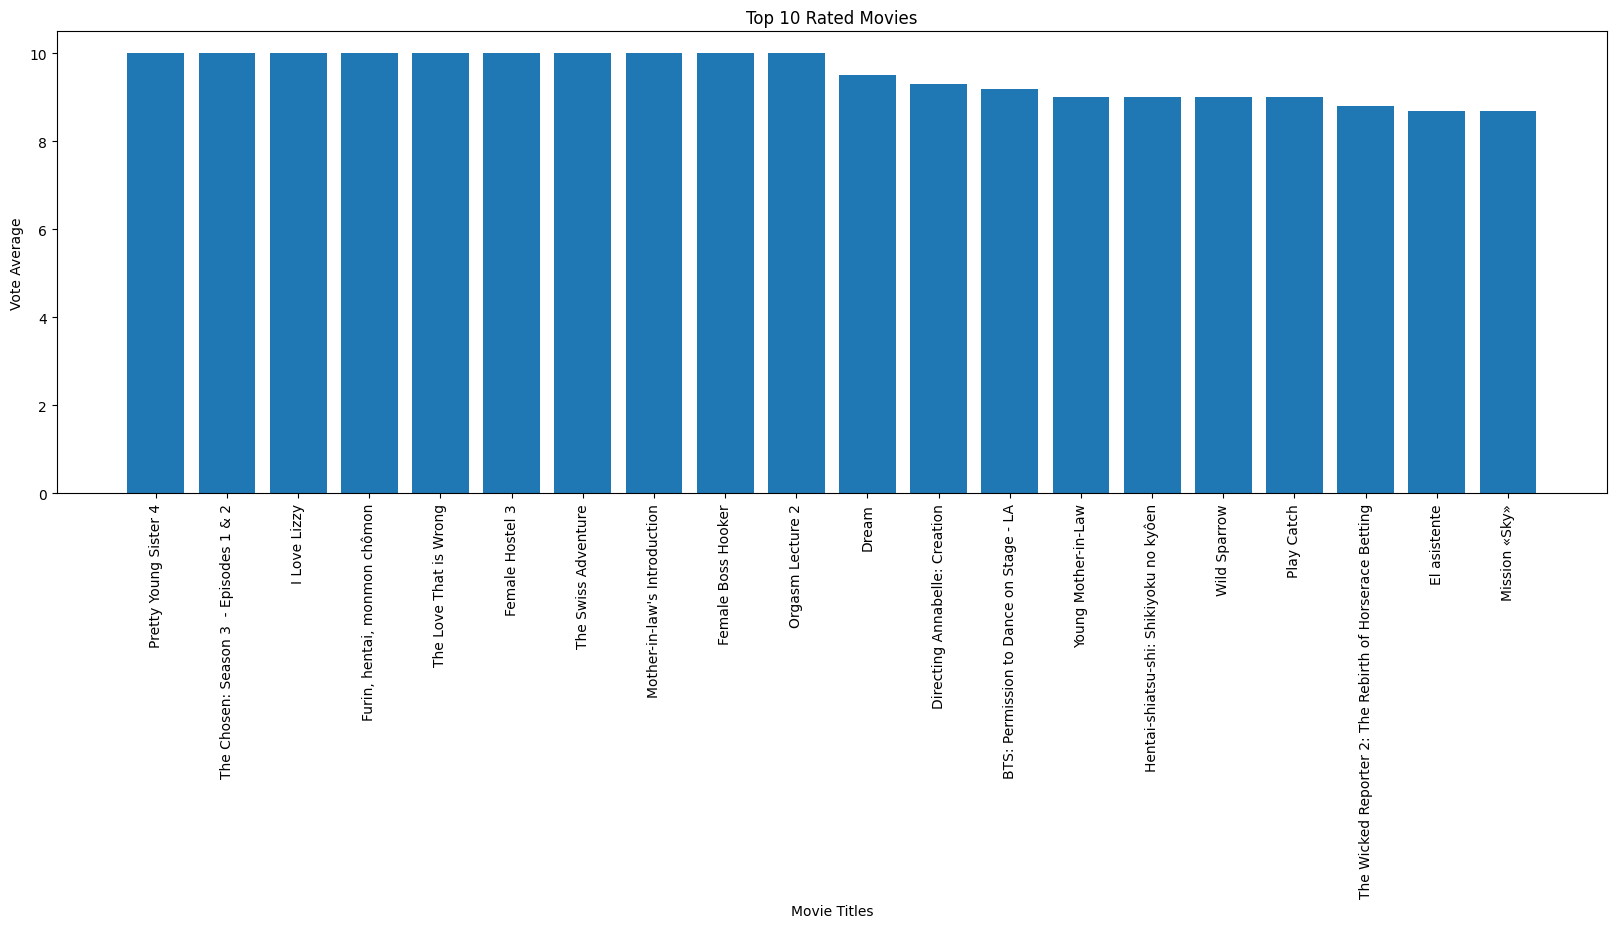

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.bar(titles, ratings)
plt.xlabel('Movie Titles')
plt.ylabel('Vote Average')
plt.title('Top 10 Rated Movies')
plt.xticks(rotation=90)
plt.show()

In [24]:
data.columns

Index(['id', 'title', 'release_date', 'genres', 'original_language',
       'vote_average', 'vote_count', 'popularity', 'overview', 'budget',
       'production_companies', 'revenue', 'runtime', 'tagline'],
      dtype='object')

In [25]:
data["genres"].value_counts()

['Drama']                                                                                  576
['Comedy']                                                                                 386
['Drama', 'Romance']                                                                       288
['Horror']                                                                                 236
['Comedy', 'Romance']                                                                      192
                                                                                          ... 
['Science Fiction', 'Comedy', 'Crime']                                                       1
['Horror', 'Mystery', 'Comedy']                                                              1
['Fantasy', 'Thriller', 'Action', 'Crime']                                                   1
['Adventure', 'Western', 'History']                                                          1
['TV Movie', 'Fantasy', 'Animation', 'Action', 'Th

In [26]:
genres = data["genres"]

all_genres = [genre.split(",") for genre in genres]
all_genres = [genre.strip() for sublist in all_genres for genre in sublist]
all_genres = [genre.replace("'", "").replace("[", "").replace("]", "").strip() for genre in all_genres]
all_genres[:5]

['Horror', 'Mystery', 'Thriller', 'Action', 'Adventure']

In [27]:
#One dimensional array
genres_data = pd.Series(all_genres).value_counts()

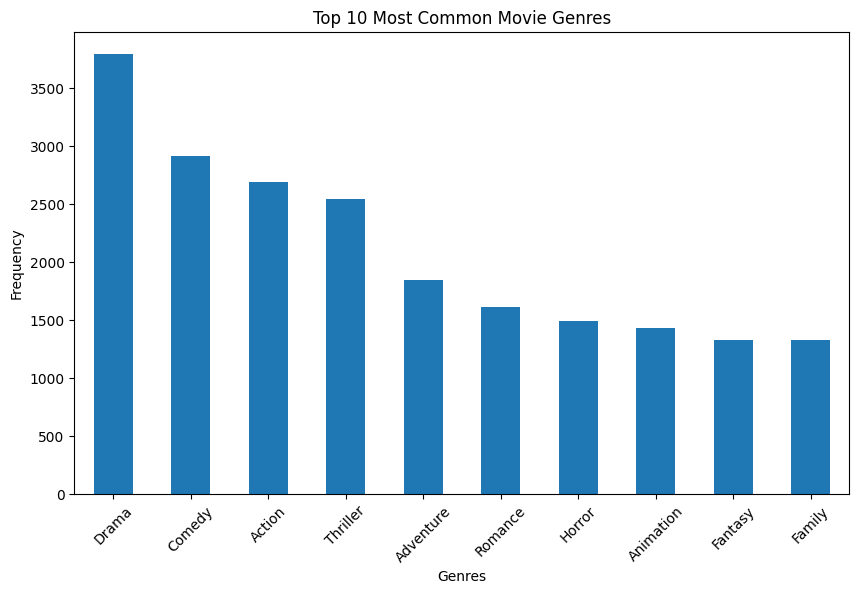

In [28]:
top_10_genres = genres_data.head(10)

# Create a bar plot to visualize the most common genres
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Movie Genres')
plt.xticks(rotation=45)
plt.show()

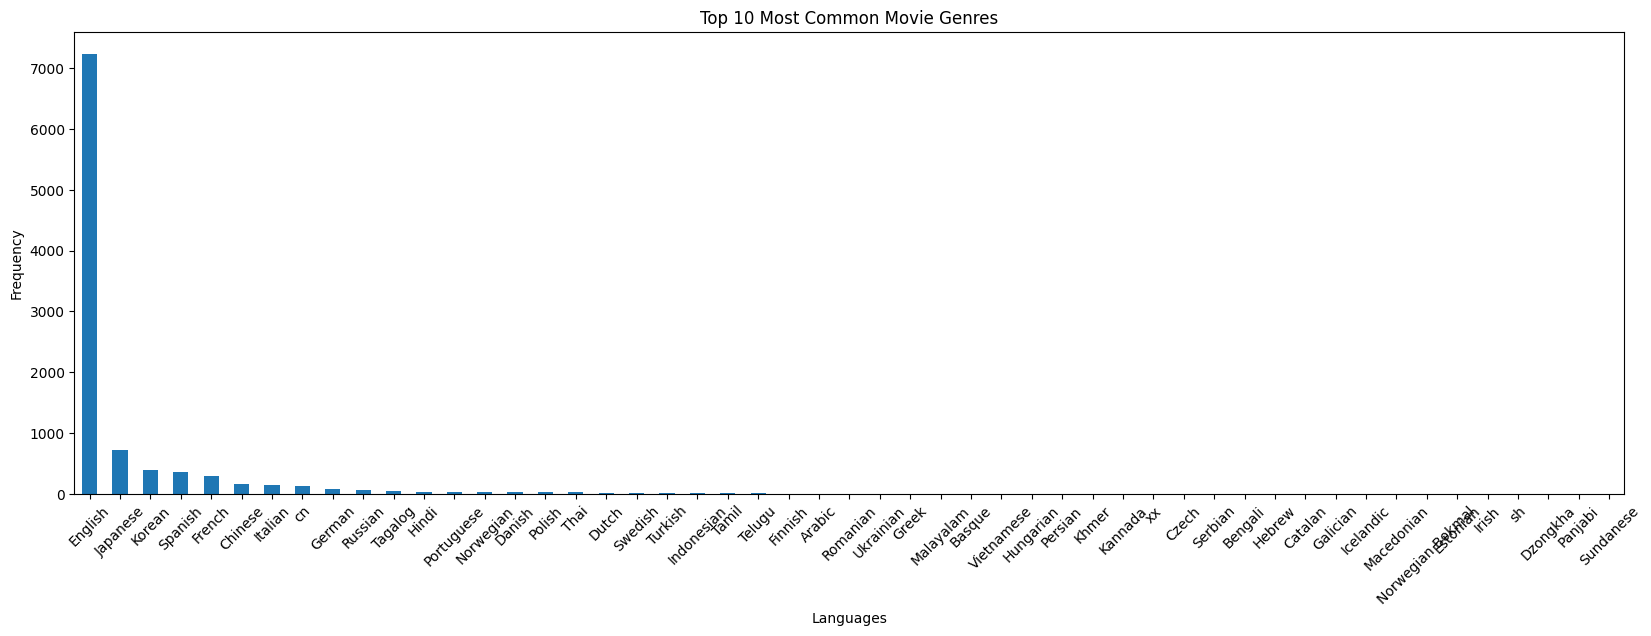

In [29]:
languages_count = data["original_language"].value_counts()

# Create a bar plot to visualize the most common languages
plt.figure(figsize=(20, 6))
languages_count.plot(kind='bar')
plt.xlabel('Languages')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Movie Genres')
plt.xticks(rotation=45)
plt.show()

In [30]:
data.columns

Index(['id', 'title', 'release_date', 'genres', 'original_language',
       'vote_average', 'vote_count', 'popularity', 'overview', 'budget',
       'production_companies', 'revenue', 'runtime', 'tagline'],
      dtype='object')

In [31]:
data["release_date"]

0       2023-04-05
1       2023-02-15
2       2023-04-05
3       2023-04-18
4       2023-03-15
           ...    
9995    2016-10-21
9996    2006-10-28
9997    2007-10-03
9998    2017-08-31
9999    2017-11-10
Name: release_date, Length: 10000, dtype: object

In [32]:
# Convert the "release date" column to datetime format
data["release_date"] = pd.to_datetime(data["release_date"])

# Extract the year from the "release date" column
data["year"] = data["release_date"].dt.year

In [33]:
year_counts  = data["year"].value_counts().sort_index()
year_counts

1902      1
1920      1
1921      1
1922      1
1925      1
       ... 
2023    465
2024     13
2025      2
2026      1
2028      1
Name: year, Length: 105, dtype: int64

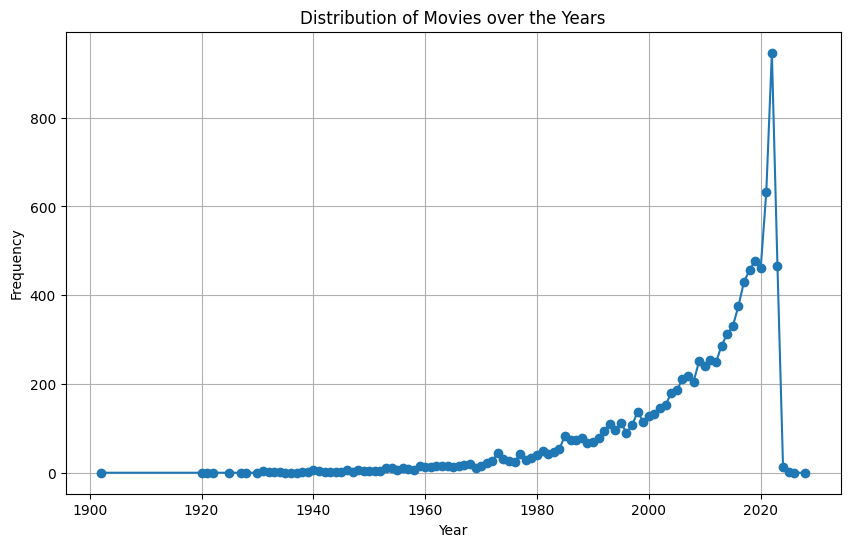

In [34]:
year_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movies over the Years')
plt.grid(True)
plt.show()